In [ ]:
import numpy as np
import pandas as pd
import tqdm
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
final_2018_2021 = pd.read_csv('/content/drive/MyDrive/bethelegend/final_2018_2021.csv', encoding='euc-kr')

In [ ]:
#선발 출장에 한정
final_2018_2021 = final_2018_2021[final_2018_2021['start_member'] == 1]

In [ ]:
#3월, 4월 데이터 제외
final_2018_2021 = final_2018_2021.loc[final_2018_2021['day']>= 500]

In [ ]:
#0타수 데이터 제외
final_2018_2021 = final_2018_2021[final_2018_2021['ab']>0]

### **Multi layer Perceptron in Be the legend**

In [ ]:
mlp_data = final_2018_2021.loc[:, ['name', 'day', 'start_member', 'vs_team', 'avg', 'slg', 'ops', 'avLI', 'RE24', 'WPA', 'home/away_avg_y', 'vs_ab', 'vs_hit', 'vs_avg', 'recent_5days_avg', 'recent_5games_avg', 'recent_10games_avg', 'success_10days', 'success_10games', 'result_y']]

In [ ]:
mlp_data = final_2018_2021.loc[:, ['name', 'day', 'start_member', 'vs_team', 'avg', 'slg', 'ops', 'avLI', 'RE24', 'WPA', 'home/away_avg_y', 'vs_ab', 'vs_hit', 'vs_avg', 'result_y']]

In [ ]:
mlp_data

In [ ]:
len(mlp_data)

29395

In [ ]:
len(mlp_data[mlp_data['result_y'] == 1]) / len(mlp_data) * 100

67.47065827521688

In [ ]:
from keras.utils.np_utils import to_categorical
import numpy as np
from sklearn.preprocessing import minmax_scale
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from sklearn.model_selection import train_test_split

### **Training data set / Test data set 분할**

In [ ]:
mlp_train, mlp_test = train_test_split(mlp_data, test_size=0.2, random_state=50)

In [ ]:
#현재 가지고 있는 모든 피쳐 사용

X_train = mlp_train.loc[:, ['avg', 'slg', 'ops', 'avLI', 'RE24', 'WPA', 'home/away_avg_y', 'vs_avg', 'recent_5days_avg', 'recent_5games_avg', 'recent_10games_avg', 'success_10days', 'success_10games']]
y_train = mlp_train.loc[:, ['result_y']]

X_test = mlp_test.loc[:, ['avg', 'slg', 'ops', 'avLI', 'RE24', 'WPA', 'home/away_avg_y', 'vs_avg', 'recent_5days_avg', 'recent_5games_avg', 'recent_10games_avg', 'success_10days', 'success_10games']]
y_test = mlp_test.loc[:, ['result_y']]

In [ ]:
#최근 지표를 제외한 것

X_train = mlp_train.loc[:, ['avg', 'slg', 'ops', 'avLI', 'RE24', 'WPA', 'home/away_avg_y', 'vs_avg']]
y_train = mlp_train.loc[:, ['result_y']]

X_test = mlp_test.loc[:, ['avg', 'slg', 'ops', 'avLI', 'RE24', 'WPA', 'home/away_avg_y', 'vs_avg']]
y_test = mlp_test.loc[:, ['result_y']]

In [ ]:
#최근 지표에 홈원정 지표마저 제외한 것

X_train = mlp_train.loc[:, ['avg', 'slg', 'ops', 'avLI', 'RE24', 'WPA']]
y_train = mlp_train.loc[:, ['result_y']]

X_test = mlp_test.loc[:, ['avg', 'slg', 'ops', 'avLI', 'RE24', 'WPA']]
y_test = mlp_test.loc[:, ['result_y']]

In [ ]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
number_of_train_samples = X_train.shape[0]
width = X_train.shape[1]
X_train = X_train.reshape(number_of_train_samples, width)

In [ ]:
number_of_test_samples = X_test.shape[0]
X_test = X_test.reshape(number_of_test_samples, width)

In [ ]:
X_train = minmax_scale(X_train, feature_range=(0,1), axis = 0)
X_test = minmax_scale(X_test, feature_range=(0,1), axis = 0)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### **Validation data set / Training data set 분할**

In [ ]:
X_val = X_train[:5000]
X_train = X_train[5000:]

y_val = y_train[:5000]
y_train = y_train[5000:]

### **Various MLP Model**

In [ ]:
#Activation = Relu & Sigmoid 
#Loss = 0.4036 - Accuracy = 0.8127
model = Sequential()

model.add(Dense(32, input_dim= width, kernel_initializer = 'glorot_uniform', activation = 'relu'))

# model.add(Dense(96, kernel_initializer = 'glorot_uniform', activation = 'relu'))
model.add(Dense(48, activation = 'relu'))
model.add(Dense(2, activation = 'sigmoid'))

In [ ]:
#loss: 0.4012 - acc: 0.8142
model = Sequential()

model.add(Dense(16, input_dim= width, kernel_initializer = 'glorot_uniform', activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(2, activation = 'sigmoid'))

In [ ]:
#loss: 0.4051 - acc: 0.8131
model = Sequential()

model.add(Dense(16, input_dim= width, kernel_initializer = 'glorot_uniform', activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(2, activation = 'sigmoid'))

In [ ]:
#loss: 0.4387 - acc: 0.8118
model = Sequential()

model.add(Dense(64, input_dim= width, kernel_initializer = 'glorot_uniform', activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(2, activation = 'sigmoid'))

In [ ]:
#loss: 0.3979 - acc: 0.8148 (loss function: binary_crossentrophy, optimizer : rmsprop)
#loss: 0.1295 - acc: 0.8165 (loss function: mean_squared_error, optimizer : Adam)
model = Sequential()

model.add(Dense(32, input_dim= width, kernel_initializer = 'glorot_uniform', activation = 'relu'))
model.add(Dense(2, activation = 'sigmoid'))

In [ ]:
#loss: 0.1306 - acc: 0.8136 (loss function: mean_squared_error, optimizer: rmsprop, batch_size: 32)
model = Sequential()

model.add(Dense(32, input_dim= width, kernel_initializer = 'glorot_uniform', activation = 'relu'))
model.add(Dense(16, input_dim= width, kernel_initializer = 'glorot_uniform', activation = 'relu'))
model.add(Dense(2, activation = 'sigmoid'))

In [ ]:
# loss: 0.4701 - acc: 0.8083 (loss function: binary_crossentrophy, optimizer : rmsprop, batch_size: 32)
# loss: 0.1391 - acc: 0.8100 (loss function: mean_squared_error, optimizer : rmsprop, batch_size: 32)
model = Sequential()

model.add(Dense(64, input_dim= width, kernel_initializer = 'glorot_uniform', activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(2, activation = 'sigmoid'))

In [ ]:
# loss: 0.1287 - acc: 0.8178 (loss function: mean_squared_error, optimizer : Adam, batch_size: 64)
model = Sequential()

model.add(Dense(64, input_dim= width, kernel_initializer = 'HeNormal', activation = 'relu'))
# model.add(Dense(64, kernel_initializer = 'HeNormal', activation = 'relu'))
model.add(Dense(2, activation = 'sigmoid'))

In [ ]:
# loss: 0.1327 - acc: 0.8101 (loss function: mean_squared_error, optimizer : rmsprop, batch_size: 32)
model = Sequential()

model.add(Dense(64, input_dim= width, kernel_initializer = 'HeNormal', activation = 'relu'))
model.add(Dense(64, kernel_initializer = 'HeNormal', activation = 'relu'))
model.add(Dense(2, activation = 'sigmoid'))

In [ ]:
# loss: 0.1284 - acc: 0.8190
# best model in now!!
model = Sequential()

model.add(Dense(64, input_dim= width, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation = 'sigmoid'))

In [ ]:
# loss: 0.1309 - acc: 0.8159
model = Sequential()

model.add(Dense(32, input_dim= width, kernel_initializer = 'HeNormal', activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(16, kernel_initializer = 'HeNormal', activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(4, kernel_initializer = 'HeNormal', activation = 'relu'))
model.add(Dense(2, activation = 'sigmoid'))

In [ ]:
#Activation = Sigmoid
model = Sequential()

model.add(Dense(512, input_dim= width, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
# model.add(Dropout(0.3))
model.add(Dense(300, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
model.add(Dense(256, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

model.add(Dense(128, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

model.add(Dense(64, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

model.add(Dense(32, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
model.add(Dense(16, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
model.add(Dense(2, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

### **MLP experiment**

In [ ]:
# MLP model_1
# 3 layers & 64 units
# activation = sigmoid & softmax
# loss = binary_crossentrophy, optimizer = rmsprop
# loss: 0.4028 & acc: 0.8135

def mlp_model1():
    model = Sequential()

    model.add(Dense(64, input_dim= width, activation = 'sigmoid'))
    model.add(Dense(64, activation = 'sigmoid'))
    model.add(Dense(2, activation = 'softmax'))

    model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics=['acc'])

    return model

In [ ]:
model1 = mlp_model1()
history = model1.fit(X_train, y_train, epochs = 100, validation_data=(X_val, y_val), verbose = 0)
history_dict = history.history

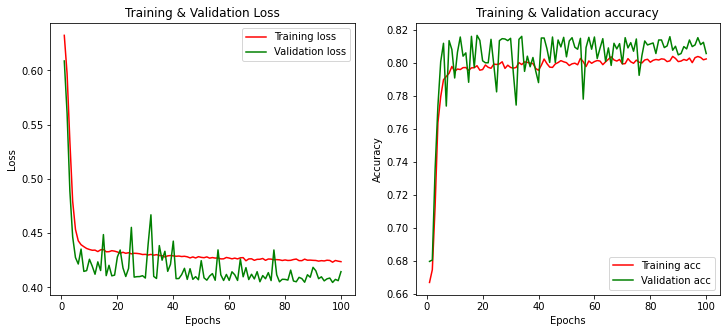

In [ ]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
acc = history_dict['acc']
val_acc = history_dict['val_acc']

epochs = range(1, len(loss)+1)

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'red', label='Training loss') 
plt.plot(epochs, val_loss, 'green', label='Validation loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'red', label='Training acc') 
plt.plot(epochs, val_acc, 'green', label='Validation acc')
plt.title('Training & Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
results = model1.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

276/276 [==============================] - 0s 729us/step - loss: 0.4049 - acc: 0.8123
Test accuracy:  0.8123369812965393


In [ ]:
# MLP model_2
# 3 layers & 64 units
# activation = relu & sigmoid
# loss = binary_crossentrophy, optimizer = rmsprop
# loss: 0.4365 & acc: 0.8042

def mlp_model2():
    model = Sequential()

    model.add(Dense(64, input_dim= width, activation = 'relu'))
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(2, activation = 'sigmoid'))

    model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics=['acc'])

    return model

In [ ]:
model2 = mlp_model2()
history = model2.fit(X_train, y_train, epochs = 100, validation_data=(X_val, y_val), verbose = 0)
history_dict = history.history

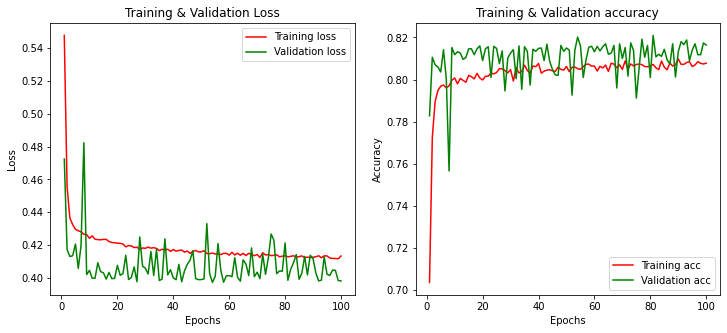

In [ ]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
acc = history_dict['acc']
val_acc = history_dict['val_acc']

epochs = range(1, len(loss)+1)

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'red', label='Training loss') 
plt.plot(epochs, val_loss, 'green', label='Validation loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'red', label='Training acc') 
plt.plot(epochs, val_acc, 'green', label='Validation acc')
plt.title('Training & Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
results = model2.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

276/276 [==============================] - 0s 679us/step - loss: 0.4190 - acc: 0.8159
Test accuracy:  0.815852165222168


In [ ]:
# MLP model_3
# 3 layers & 64 units
# activation = relu & sigmoid
# loss = binary_crossentrophy, optimizer = rmsprop
# initialization = kernel_initializer
# loss: 0.4474 & acc: 0.8026

def mlp_model3():
    model = Sequential()

    model.add(Dense(64, input_dim= width, kernel_initializer = 'glorot_uniform'))
    model.add(Activation('relu'))
    model.add(Dense(64, kernel_initializer = 'glorot_uniform'))
    model.add(Activation('relu'))
    model.add(Dense(2, kernel_initializer = 'glorot_uniform'))
    model.add(Activation('sigmoid'))

    model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics=['acc'])

    return model

In [ ]:
model3 = mlp_model3()
history = model3.fit(X_train, y_train, epochs = 100, validation_data=(X_val, y_val), verbose = 0)
history_dict = history.history

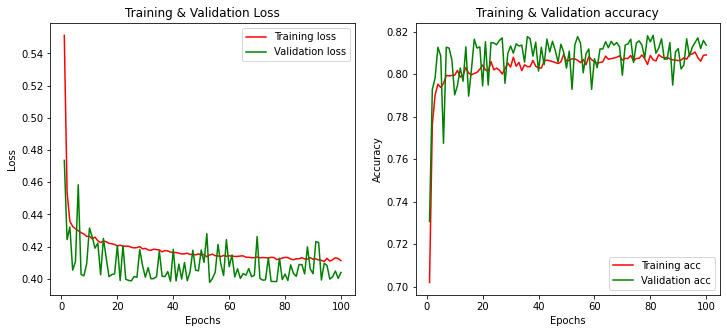

In [ ]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
acc = history_dict['acc']
val_acc = history_dict['val_acc']

epochs = range(1, len(loss)+1)

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'red', label='Training loss') 
plt.plot(epochs, val_loss, 'green', label='Validation loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'red', label='Training acc') 
plt.plot(epochs, val_acc, 'green', label='Validation acc')
plt.title('Training & Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
results = model3.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

276/276 [==============================] - 0s 778us/step - loss: 0.4102 - acc: 0.8154
Test accuracy:  0.8153985738754272


In [ ]:
# MLP model_4
# 3 layers & 64 units
# activation = relu & sigmoid
# loss = binary_crossentrophy, optimizer = rmsprop
# initialization = HeNormal
# loss: 0.4607 & acc: 0.7965

def mlp_model4():
    model = Sequential()

    model.add(Dense(64, input_dim= width, kernel_initializer = 'HeNormal'))
    model.add(Activation('relu'))
    model.add(Dense(64, kernel_initializer = 'HeNormal'))
    model.add(Activation('relu'))
    model.add(Dense(2, kernel_initializer = 'HeNormal'))
    model.add(Activation('sigmoid'))

    model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics=['acc'])

    return model

In [ ]:
model4 = mlp_model4()
history = model4.fit(X_train, y_train, epochs = 100, validation_data=(X_val, y_val), verbose = 0)
history_dict = history.history

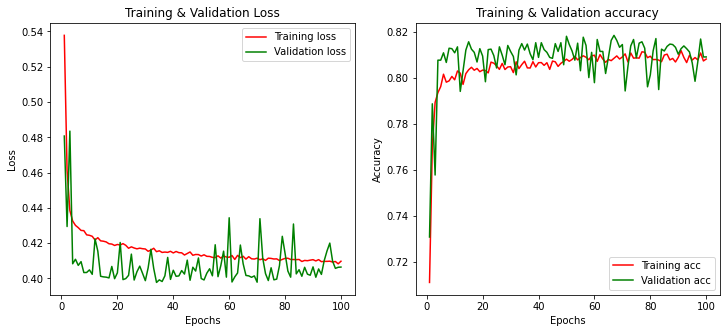

In [ ]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
acc = history_dict['acc']
val_acc = history_dict['val_acc']

epochs = range(1, len(loss)+1)

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'red', label='Training loss') 
plt.plot(epochs, val_loss, 'green', label='Validation loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'red', label='Training acc') 
plt.plot(epochs, val_acc, 'green', label='Validation acc')
plt.title('Training & Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
results = model4.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

276/276 [==============================] - 0s 695us/step - loss: 0.4284 - acc: 0.8156
Test accuracy:  0.8156253695487976


In [ ]:
# MLP model_5
# 3 layers & 64 units
# activation = relu & sigmoid
# loss = binary_crossentrophy, optimizer = adam
# initialization = HeNormal
# loss: 0.4173 & acc: 0.8132

def mlp_model5():
    model = Sequential()

    model.add(Dense(64, input_dim= width, kernel_initializer = 'HeNormal'))
    model.add(Activation('relu'))
    model.add(Dense(64, kernel_initializer = 'HeNormal'))
    model.add(Activation('relu'))
    model.add(Dense(2, kernel_initializer = 'HeNormal'))
    model.add(Activation('sigmoid'))

    model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics=['acc'])

    return model

In [ ]:
model5 = mlp_model5()
history = model5.fit(X_train, y_train, epochs = 100, validation_data=(X_val, y_val), verbose = 0)
history_dict = history.history

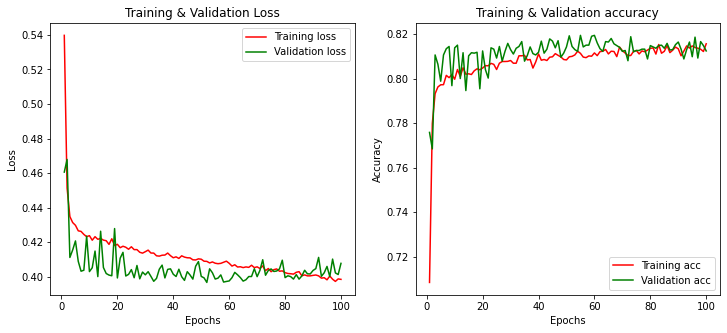

In [ ]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
acc = history_dict['acc']
val_acc = history_dict['val_acc']

epochs = range(1, len(loss)+1)

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'red', label='Training loss') 
plt.plot(epochs, val_loss, 'green', label='Validation loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'red', label='Training acc') 
plt.plot(epochs, val_acc, 'green', label='Validation acc')
plt.title('Training & Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
results = model5.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

276/276 [==============================] - 0s 692us/step - loss: 0.4113 - acc: 0.8104
Test accuracy:  0.8104093670845032


In [ ]:
from keras.layers import BatchNormalization

In [ ]:
# MLP model_6 
# Batch_Normal
# 3 layers & 64 units
# activation = relu & sigmoid
# loss = binary_crossentrophy, optimizer = adam
# initialization = HeNormal
# loss: 0.6793 & acc: 0.7383

def mlp_model6():
    model = Sequential()

    model.add(Dense(64, input_dim= width, kernel_initializer = 'HeNormal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(64, kernel_initializer = 'HeNormal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(2, kernel_initializer = 'HeNormal'))
    model.add(Activation('sigmoid'))

    model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics=['acc'])

    return model

In [ ]:
model6 = mlp_model6()
history = model6.fit(X_train, y_train, epochs = 200, validation_data=(X_val, y_val), verbose = 0)
history_dict = history.history

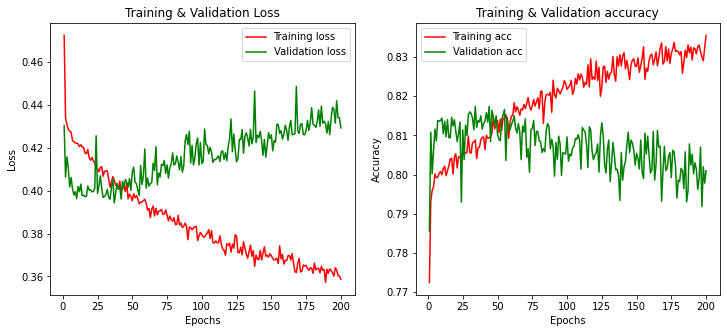

In [ ]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
acc = history_dict['acc']
val_acc = history_dict['val_acc']

epochs = range(1, len(loss)+1)

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'red', label='Training loss') 
plt.plot(epochs, val_loss, 'green', label='Validation loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'red', label='Training acc') 
plt.plot(epochs, val_acc, 'green', label='Validation acc')
plt.title('Training & Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
results = model6.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

276/276 [==============================] - 0s 760us/step - loss: 0.9812 - acc: 0.7044
Test accuracy:  0.7043882608413696


In [ ]:
from keras.layers import Dropout

In [ ]:
# MLP model_7 
# Dropout
# 3 layers & 64 units
# activation = relu & sigmoid
# loss = binary_crossentrophy, optimizer = adam
# initialization = HeNormal
# loss: 0.4284 - acc: 0.7910

def mlp_model7():
    model = Sequential()

    model.add(Dense(64, input_dim= width, kernel_initializer = 'HeNormal'))
    model.add(Activation('relu'))
    model.add(Dropout(0.2)) 
    model.add(Dense(64, kernel_initializer = 'HeNormal'))
    model.add(Activation('relu'))
    model.add(Dropout(0.2)) 
    model.add(Dense(2, kernel_initializer = 'HeNormal'))
    model.add(Activation('sigmoid'))

    model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics=['acc'])

    return model

In [ ]:
model7 = mlp_model7()
history = model7.fit(X_train, y_train, epochs = 200, validation_data=(X_val, y_val), verbose = 0)
history_dict = history.history

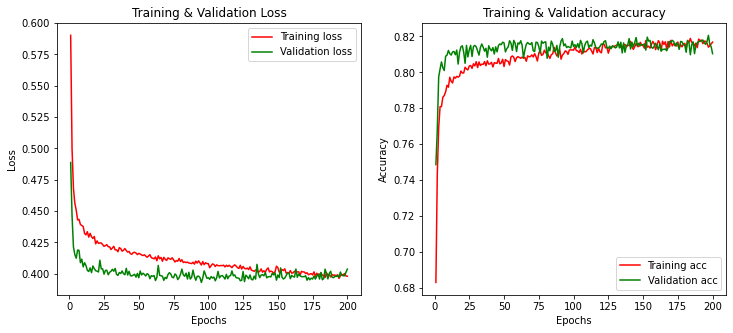

In [ ]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
acc = history_dict['acc']
val_acc = history_dict['val_acc']

epochs = range(1, len(loss)+1)

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'red', label='Training loss') 
plt.plot(epochs, val_loss, 'green', label='Validation loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'red', label='Training acc') 
plt.plot(epochs, val_acc, 'green', label='Validation acc')
plt.title('Training & Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
results = model7.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

276/276 [==============================] - 0s 773us/step - loss: 0.4257 - acc: 0.8034
Test accuracy:  0.8033790588378906


In [ ]:
# MLP model_8
# Batch_Normal
# Dropout
# 3 layers & 64 units
# activation = relu & sigmoid
# loss = binary_crossentrophy, optimizer = adam
# initialization = HeNormal
# loss: 0.5285 - acc: 0.7452

def mlp_model8():
    model = Sequential()

    model.add(Dense(64, input_dim= width, kernel_initializer = 'HeNormal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2)) 
    model.add(Dense(64, kernel_initializer = 'HeNormal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2)) 
    model.add(Dense(2, kernel_initializer = 'HeNormal'))
    model.add(Activation('sigmoid'))

    model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics=['acc'])

    return model

In [ ]:
model8 = mlp_model8()
history = model8.fit(X_train, y_train, epochs = 200, validation_data=(X_val, y_val), verbose = 0)
history_dict = history.history

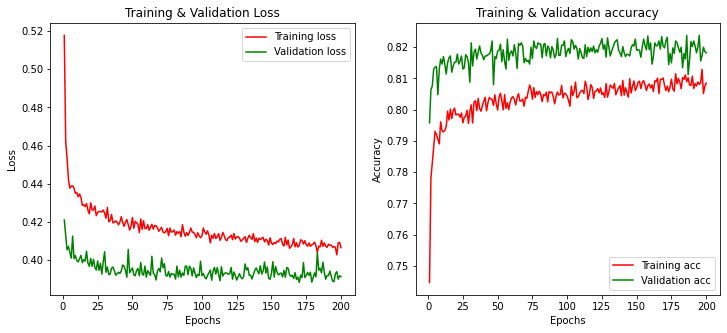

In [ ]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
acc = history_dict['acc']
val_acc = history_dict['val_acc']

epochs = range(1, len(loss)+1)

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'red', label='Training loss') 
plt.plot(epochs, val_loss, 'green', label='Validation loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'red', label='Training acc') 
plt.plot(epochs, val_acc, 'green', label='Validation acc')
plt.title('Training & Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
results = model8.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

276/276 [==============================] - 0s 763us/step - loss: 0.5858 - acc: 0.7280
Test accuracy:  0.7279736995697021


In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# MLP model_ensemble
# Dropout
# 3 layers & 64 units
# activation = relu & sigmoid
# loss = binary_crossentrophy, optimizer = adam
# initialization = HeNormal
# loss: 0.5285 - acc: 0.7452

def mlp_model_en():
    model = Sequential()

    model.add(Dense(64, input_dim= width, kernel_initializer = 'HeNormal'))
    model.add(Activation('relu'))
    model.add(Dropout(0.2)) 
    model.add(Dense(64, kernel_initializer = 'HeNormal'))
    model.add(Activation('relu'))
    model.add(Dropout(0.2)) 
    model.add(Dense(2, kernel_initializer = 'HeNormal'))
    model.add(Activation('sigmoid'))

    model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics=['acc'])

    return model

In [ ]:
en_model1 = KerasClassifier(build_fn = mlp_model_en, epochs = 200, verbose = 0)
en_model1._estimator_type="classifier"
en_model2 = KerasClassifier(build_fn = mlp_model_en, epochs = 200, verbose = 0)
en_model2._estimator_type="classifier"
en_model3 = KerasClassifier(build_fn = mlp_model_en, epochs = 200, verbose = 0)
en_model3._estimator_type="classifier"

In [ ]:
y_train = np.argmax(y_train, axis = 1)
y_test = np.argmax(y_test, axis = 1)

In [ ]:
ensemble_clf = VotingClassifier(estimators = [('en_model1', en_model1), ('en_model2', en_model2), ('en_model3', en_model3)], voting = 'soft')
ensemble_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('en_model1',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x7f13e86ab1d0>),
                             ('en_model2',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x7f13e8688c10>),
                             ('en_model3',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x7f13e8688ad0>)],
                 flatten_transform=True, n_jobs=None, voting='soft',
                 weights=None)

In [ ]:
y_pred = ensemble_clf.predict(X_test)
print('Acc: ', accuracy_score(y_pred, y_test))

Acc:  0.8081415126431568


### **기존 연구**

In [ ]:
#최근 양상 지표를 제외하고 실험
def original_feature():
    model = Sequential()

    model.add(Dense(64, input_dim= width, kernel_initializer = 'HeNormal'))
    model.add(Activation('relu'))
    model.add(Dropout(0.2)) 
    model.add(Dense(64, kernel_initializer = 'HeNormal'))
    model.add(Activation('relu'))
    model.add(Dropout(0.2)) 
    model.add(Dense(2, kernel_initializer = 'HeNormal'))
    model.add(Activation('sigmoid'))

    model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics=['acc'])

    return model

In [ ]:
model7 = original_feature()
history = model7.fit(X_train, y_train, epochs = 200, validation_split=0.2, verbose = 0)
history_dict = history.history

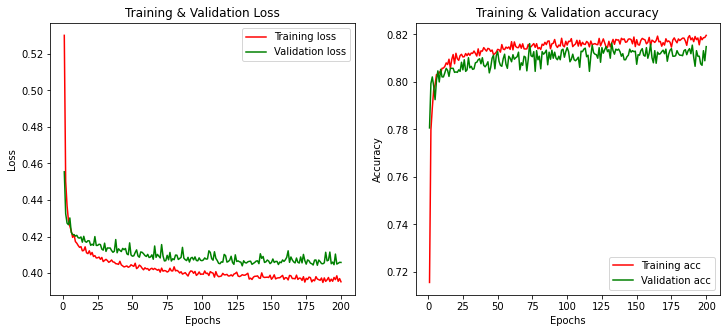

In [ ]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
acc = history_dict['acc']
val_acc = history_dict['val_acc']

epochs = range(1, len(loss)+1)

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'red', label='Training loss') 
plt.plot(epochs, val_loss, 'green', label='Validation loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'red', label='Training acc') 
plt.plot(epochs, val_acc, 'green', label='Validation acc')
plt.title('Training & Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
results = model7.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

184/184 [==============================] - 0s 2ms/step - loss: 0.5094 - acc: 0.7477
Test accuracy:  0.7477462291717529


### **Stratified K-Fold Cross Validation (auto)**

In [ ]:
mlp_data = final_2018_2021.loc[:, ['name', 'day', 'start_member', 'vs_team', 'avg', 'slg', 'ops', 'avLI', 'RE24', 'WPA', 'home/away_avg_y', 'vs_ab', 'vs_hit', 'vs_avg', 'recent_5days_avg', 'recent_5games_avg', 'recent_10games_avg', 'success_10days', 'success_10games', 'result_y']]

In [ ]:
X = mlp_data.loc[:, ['avg', 'slg', 'ops', 'avLI', 'RE24', 'WPA', 'home/away_avg_y', 'vs_avg', 'recent_5days_avg', 'recent_5games_avg', 'recent_10games_avg', 'success_10days', 'success_10games']]
y = mlp_data.loc[:, ['result_y']]

In [ ]:
X = X.to_numpy()
y = y.to_numpy()

In [ ]:
number_of_samples = X.shape[0]
width = X.shape[1]
X = X.reshape(number_of_samples, width)

In [ ]:
X = minmax_scale(X, feature_range=(0,1), axis = 0)
y = to_categorical(y)

In [ ]:
def mlp_model_k():
    model = Sequential()

    model.add(Dense(64, input_dim= width, kernel_initializer = 'HeNormal'))
    model.add(Activation('relu'))
    model.add(Dropout(0.2)) 
    model.add(Dense(64, kernel_initializer = 'HeNormal'))
    model.add(Activation('relu'))
    model.add(Dropout(0.2)) 
    model.add(Dense(2, kernel_initializer = 'HeNormal'))
    model.add(Activation('sigmoid'))

    model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics=['acc'])

    return model

In [ ]:
model = KerasClassifier(build_fn=mlp_model_k, epochs=150, batch_size=32, verbose=0)  

In [ ]:
 kfold = KFold(n_splits = 5, shuffle = True, random_state = 50) 
 results = cross_val_score(model, X, y, cv=kfold)

In [ ]:
results, round(np.mean(results),3)